## pyKO Test 14 Compare Tillotson EOS implementations and TIL/MGR/SES EOS for Fe

Compare Hosono, iSALE, and Asphaug implementations of the Tillotson EOS. Compare sound speed calculations.
Resolved some bugs in iSALE function.

### WARNING: This notebook is a mixture of SESAME table units and mks and pyKO units.
TIL EOS functions use energy/mass (eu/g) instead of pyKO energy/initial volume. Be careful with unit conversions.

pyKO specific energy in eu/cm3 * (1.e5 J/eu) / (rho0 cm3/g) * (1000 g/kg) --> J/K/kg 

Calls to eos_table functions are usually in mks.

Calls to other pyKO functions are in code units.

pyKO documentation: https://impactswiki.github.io/pyko

Set the path to pyko and your fortran compiler in import-modules.py file

Sarah T. Stewart<br>
July 4, 2023<br>

In [1]:
# import the same set of modules for each test run provided with pyKO
%run import-modules

import eos_table as etab # Stewart group EOS table libraries for ANEOS and Tillotson
from copy import deepcopy

Platform:  Darwin Kernel Version 22.5.0: Thu Jun  8 22:21:34 PDT 2023; root:xnu-8796.121.3~7/RELEASE_ARM64_T8112
python version:  3.11.4
matplotlib version:  3.7.1
hvplot version:  0.8.4
numpy version:  1.25.0
pandas version:  2.0.2
pickle version:  4.0
yaml version:  6.0
pint version:  0.22
pyko version:  v0.6.1-2023-07-04

/usr/local/bin/gfortran

GNU Fortran (GCC) 12.1.0
Copyright (C) 2022 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.




## Compare Tillotson EOS functions
Use eos_table functions to make a gridded table of Tillotson EOS and compare iSALE and Asphaug code values.

Example input parameters:

    # parameters: [rho0, E0, EIV, ECV, AA, BB, a, b, alpha, beta]
    # units:    [kg/m3, J/kg, J/kg, J/kg, Pa, Pa, [-]x4]
    # dunitetill = [3500.0, 550.0e+6, 4.500e+6, 14.50e+6, 131.00e+9,  49.00e+9, 0.5, 1.4, 5.0, 5.0]
    # Basalt parameters from iSALE -- from where? Benz?
    # basalttill = [2650.0, 4.87E8, 4.72E6, 18.2E6, 5.3E10, 5.3E10, 0.6, 0.6, 5., 5.]


In [2]:
DunEOS = etab.TillotsonClass()

# mks units
dunitetill = [3500.0, 550.0e+6, 4.500e+6, 14.50e+6, 131.00e+9,  49.00e+9, 0.5, 1.4, 5.0, 5.0, 830.]
DunEOS.assignparams(dunitetill)

print(DunEOS)



 Tillotson EOS parameters [SESAME Units]: 
   rhoref: 3.5 
   a:      0.5 
   b:      1.4 
   AA:     131.0 
   BB:     49.0 
   E0:     550.0 
   alpha:  5.0 
   beta:   5.0 
   Eiv:    4.5 
   Ecv:    14.5 
   cv:     0.00083 
 params [mks]: [3500.0, 550000000.0, 4500000.0, 14500000.0, 131000000000.0, 49000000000.0, 0.5, 1.4, 5.0, 5.0, 830.0] 



In [3]:
DunEOS.calcecold()


In [4]:
## Fill ND and NU arrays to populate the table

ND = 200
NU = 300

DunEOS.ND = ND
DunEOS.NU = NU

DunEOS.rho = np.arange(DunEOS.ND)/DunEOS.ND*(2.*DunEOS.rho0) # rho is 0.01*rho0 to 4.01*rho0
DunEOS.rho[0]= 0.01
#print(DunEOS.rho)

DunEOS.U = np.arange(DunEOS.NU)/DunEOS.NU*(8.*DunEOS.ECV)
#print(DunEOS.U)

In [5]:
# Hosono Tillotson Function
DunEOS.FillTable(matparams=dunitetill,modelname='Dunite')


Using standard Tillotson implementation (e.g., Hosono et al. 2019, Melosh 1989).
Tillotson parameters:  [3500.0, 550000000.0, 4500000.0, 14500000.0, 131000000000.0, 49000000000.0, 0.5, 1.4, 5.0, 5.0, 830.0]


In [6]:
DunEOSis = deepcopy(DunEOS)
DunEOSis.FillTable_iSALE(matparams=dunitetill,modelname='Dunite')

Using the iSALE Tillotson implementation.
Tillotson parameters:  [3500.0, 550000000.0, 4500000.0, 14500000.0, 131000000000.0, 49000000000.0, 0.5, 1.4, 5.0, 5.0, 830.0]


In [7]:
DunEOSea = deepcopy(DunEOS)
DunEOSea.FillTable_ea(matparams=dunitetill,modelname='Dunite')

Using the iSALE Asphaug implementation.
Tillotson parameters:  [3500.0, 550000000.0, 4500000.0, 14500000.0, 131000000000.0, 49000000000.0, 0.5, 1.4, 5.0, 5.0, 830.0]


Hug ie0,ir0= 0 100
Done calculating Hugoniot with Tillotson EOS table.


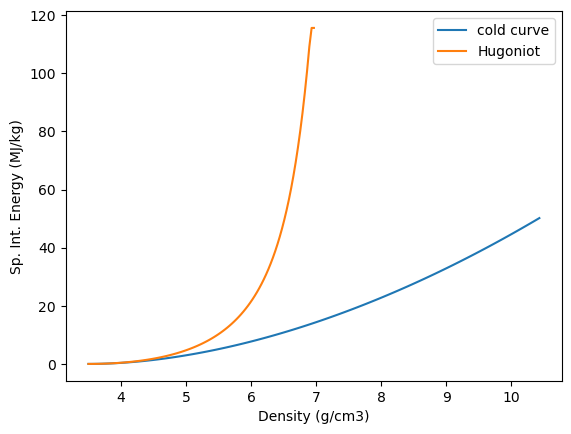

In [8]:
DunEOSis.calchugoniot(r00=3.5,e0=0.)
#print(DunEOSis.hug.P)
#print(DunEOSis.hug.T)

#plt.plot(DunEOSis.hug.rho,DunEOSis.hug.U)
plt.plot(DunEOSis.ecold.rho/1.e3,DunEOSis.ecold.U/1.e6,label='cold curve')
plt.plot(DunEOSis.hug.rho,DunEOSis.hug.U,label='Hugoniot')
plt.legend()
plt.xlabel('Density (g/cm3)')
plt.ylabel('Sp. Int. Energy (MJ/kg)')
plt.show()

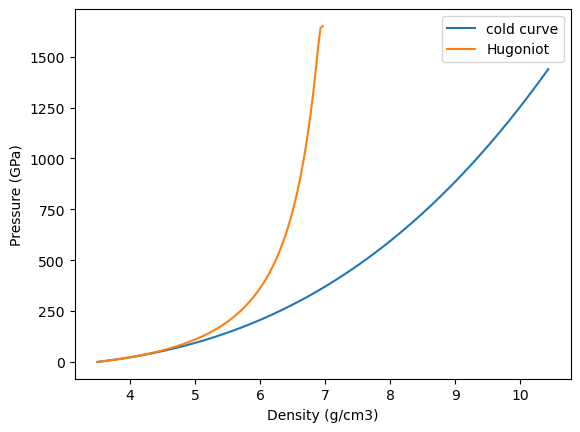

In [9]:
plt.plot(DunEOSis.ecold.rho/1.e3,DunEOSis.ecold.P/1.e9,label='cold curve')
plt.plot(DunEOSis.hug.rho,DunEOSis.hug.P,label='Hugoniot')
plt.legend()
plt.xlabel('Density (g/cm3)')
plt.ylabel('Pressure (GPa)')
plt.show()

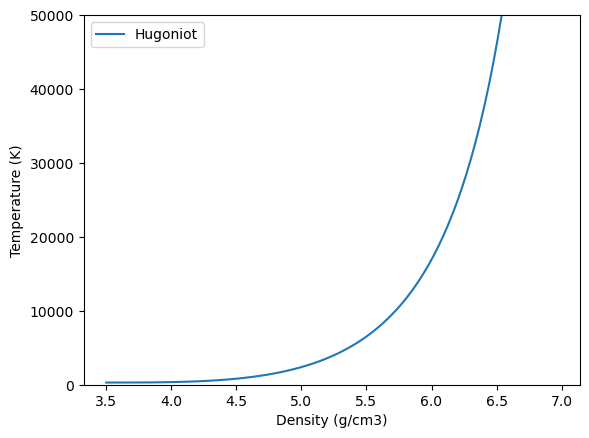

In [10]:
plt.plot(DunEOSis.hug.rho,DunEOSis.hug.T,label='Hugoniot')
plt.legend()
plt.xlabel('Density (g/cm3)')
plt.ylabel('Temperature (K)')
plt.ylim(0,50000)
plt.show()

## Compare Hugoniots -- Fe example

Use the Test13 Fe material parameters


In [11]:
# start with your initial guess of the EOS initial state 
# load and print the configuration file without running the simulation
# 
filein = './test13/test13-compare-eos-fe.yml'
# initialize the run class variable by loading the configuration file
# this loads the requires EOS tables, so you can inquire about initial states
run = RunClass(fin=filein)
# print the run class state; this will print in code units
run.checkinput()


TIL in code units =  [7.8000e+00 7.4100e-01 1.8720e-01 6.7626e-01 1.2800e+00 1.0500e+00
 5.0000e-01 1.5000e+00 5.0000e+00 5.0000e+00 4.6055e-06]

pyKO v0.6.1-2023-07-04 run parameters
   All outputs are in code units 
   Input file: ./test13/test13-compare-eos-fe.yml 
   Output file: ./test13/pyko-test13-compare-eos-iron-bin.dat 
   Number of materials: 4 
   Number of nodes in each material: [100 100 100 100] 
   Length of each material: [0.199 0.2   0.2   0.2  ] 
   Initial left edge of each material: [-0.45 -0.25  0.    0.2 ] 
   Boundary conditions: ['FREE', 'FREE']
   Material EOS:     ['TIL', 'MGR', 'MGR', 'SES'] 
   Geometry:         PLA 
   Gravity:          0.0 
   Void pressure:    1e-09 
   Time step factor: 6 
   Stop time:        0.5

mat1 Von Mises parameters: 
   Shear modulus: 0.26 
   Yield stress: 0.0020700000000000002

mat1 Fracture parameters [code units]: 
   Fracture pressure: 0.0027600000000000003 
   Fracture maximum distension (rhomin/rhoref): 0.9

Fe TIL Tillo

In [12]:
# sesame table is in pyKO code units
# g/cm3, K, Mbar
run.ieos[3].EOS.calchugoniot(r0=8.06,t0=298,pmax=9) # pmax is in Mbar


In [13]:
# TILClass is in pyKO code units
#print(run.ieos[0].params)
# g/cm3, K, Mbar
#print(run.ieos[0].ecold.rho)
#print(run.ieos[0].ecold.P)
#print(run.ieos[0].ecold.U)


In [14]:
# Tillotson case
print('pyko Til params code units = ',run.ieos[0].params)
IronEOS = etab.TillotsonClass()
irontill = deepcopy(run.ieos[0].params) # code units units to mks
irontill[0] = irontill[0]*1000.
irontill[1] = irontill[1]/irontill[0]*1.e11
irontill[2] = irontill[2]/irontill[0]*1.e11
irontill[3] = irontill[3]/irontill[0]*1.e11

irontill[4] = irontill[4]*1.e11
irontill[5] = irontill[5]*1.e11
irontill[10] = irontill[10]*1.e5*1000. # eu/K/g -> J/K/kg

print('converted to mks = ',irontill)
IronEOS.assignparams(irontill)
print('IronEOS params mks = ',IronEOS.params)
## Fill ND and NU arrays to populate the table
ND = 100
NU = 150

IronEOS.ND = ND
IronEOS.NU = NU

# mks units
IronEOS.rho = np.arange(IronEOS.ND)/IronEOS.ND*(2.5*IronEOS.rho0)
IronEOS.rho[0]= 0.01
IronEOS.U = np.arange(IronEOS.NU)/IronEOS.NU*(7.*IronEOS.ECV)
#print(IronEOS.rho) # ses units
#print(IronEOS.U) # ses units



pyko Til params code units =  [7.8000e+00 7.4100e-01 1.8720e-01 6.7626e-01 1.2800e+00 1.0500e+00
 5.0000e-01 1.5000e+00 5.0000e+00 5.0000e+00 4.6055e-06]
converted to mks =  [7.8000e+03 9.5000e+06 2.4000e+06 8.6700e+06 1.2800e+11 1.0500e+11
 5.0000e-01 1.5000e+00 5.0000e+00 5.0000e+00 4.6055e+02]
IronEOS params mks =  [7.8000e+03 9.5000e+06 2.4000e+06 8.6700e+06 1.2800e+11 1.0500e+11
 5.0000e-01 1.5000e+00 5.0000e+00 5.0000e+00 4.6055e+02]


In [15]:

IronEOS.calcecold()
#print(IronEOS.ecold.rho)
#print(IronEOS.ecold.U)
#print(IronEOS.ecold.P)

IronEOS.FillTable_iSALE(matparams=irontill,modelname='Iron')
#print(IronEOS.params)
IronEOS.calchugoniot(r00=7.8,e0=0.,pmax=1000.) # SESAME units
#print(IronEOS.hug.rho)
#print(IronEOS.hug.P)
#print(IronEOS.hug.T)


Using the iSALE Tillotson implementation.
Tillotson parameters:  [7.8000e+03 9.5000e+06 2.4000e+06 8.6700e+06 1.2800e+11 1.0500e+11
 5.0000e-01 1.5000e+00 5.0000e+00 5.0000e+00 4.6055e+02]
Hug ie0,ir0= 0 40
Done calculating Hugoniot with Tillotson EOS table.


In [16]:
# iron mie-gruneisen
# this is a standard linear EOS
# Wilkins implementation of MGR uses a 4th order expansion in finite strain -- it diverges at large compressions 
mguparr = np.arange(20000)
mgusarr = 4600+1.44*mguparr
mgparr = 7900*mguparr*mgusarr
mgrarr = 1./((1/7900)*(1.-mguparr/mgusarr))
mgearr = 0.5*mgparr*(1/7900-1/mgrarr) # mks

# extract cold curve from MGR EOS mat2 in the pyKO input file
run.ieos[1].calcecoefs()
run.ieos[1].calcecold()

# now can estimate the temperature in MGR Hugoniot BUT this is not exactly the same as calculated in pyKO
mge00 = run.ieos[1].ecoefs[0]*1.e5*1000. # J/kg
mge0arr = np.interp(mgrarr,run.ieos[1].ecold.rho*1000.,run.ieos[1].ecold.U*1.e5*1000.) # J/kg
mgp0arr = np.interp(mgrarr,run.ieos[1].ecold.rho*1000.,run.ieos[1].ecold.P*1.e11) # Pa

mgcv = run.ieos[1].cv*1.e5/run.ieos[1].rho0*1000. # eu/K/cm3 --> J/K/kg
#print(mgcv)
mgtarr = (mgearr-mge0arr)/mgcv # mks 
#print(mgtarr) # K

#print(run.ieos[1].ecold.rho)
#print(run.ieos[1].ecold.P) # code units
#print(run.ieos[1].ecold.U) # code units


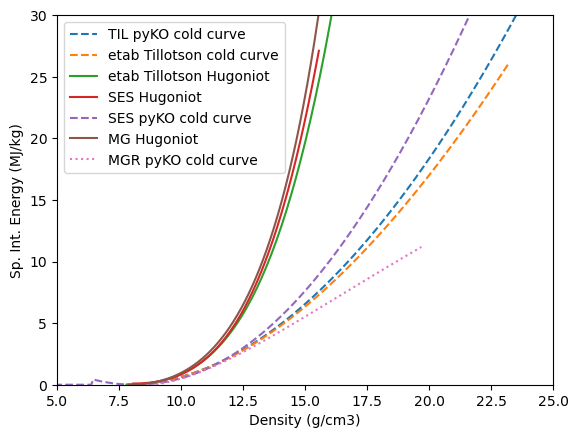

In [17]:
plt.plot(run.ieos[0].ecold.rho,run.ieos[0].ecold.U*1.e5*1000/1.e6,'--',label='TIL pyKO cold curve') # eu/g -> MJ/kg
plt.plot(IronEOS.ecold.rho/1.e3,IronEOS.ecold.U/1.e6,'--',label='etab Tillotson cold curve') # is in mks -> MJ/kg
plt.plot(IronEOS.hug.rho,IronEOS.hug.U,label='etab Tillotson Hugoniot') # sesame table units MJ/kg
plt.plot(run.ieos[3].EOS.hug.rho,run.ieos[3].EOS.hug.U*1E5*1000/1.e6,label='SES Hugoniot') # pyKO code SES TABLE units eu/g to MJ/kg
plt.plot(run.ieos[3].EOS.rho,run.ieos[3].EOS.U[0,:]*1E5*1000/1.e6,'--',label='SES pyKO cold curve') # pyKO code eu/g to MJ/kg
plt.plot(mgrarr/1.e3,mgearr/1.e6,label='MG Hugoniot')

#plt.plot(run.ieos[1].ecold.rho,run.ieos[1].ecold.U*1.e5*1000/1.e6,'--',label='MGR pyKO cold curve')
plt.plot(mgrarr/1.e3,mge0arr/1.e6,':',label='MGR pyKO cold curve')

plt.legend()
plt.ylim(0,30)
plt.xlim(5,25)
plt.xlabel('Density (g/cm3)')
plt.ylabel('Sp. Int. Energy (MJ/kg)')
plt.show()

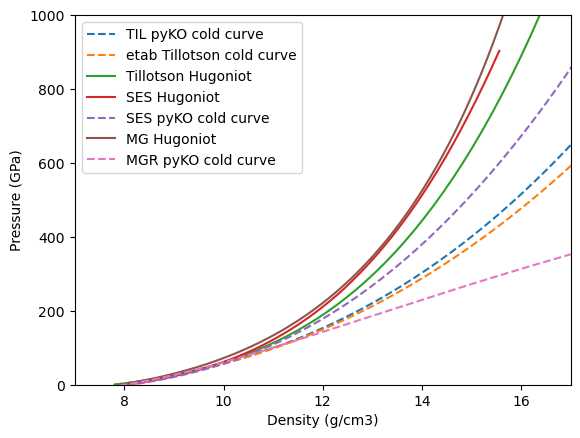

In [18]:
plt.plot(run.ieos[0].ecold.rho,run.ieos[0].ecold.P*100,'--',label='TIL pyKO cold curve') # Mbar to GPa
plt.plot(IronEOS.ecold.rho/1.e3,IronEOS.ecold.P/1.e9,'--',label='etab Tillotson cold curve') # is in mks Pa->GPa
plt.plot(IronEOS.hug.rho,IronEOS.hug.P,label='Tillotson Hugoniot') # SES Units GPa
plt.plot(run.ieos[3].EOS.hug.rho,run.ieos[3].EOS.hug.P*100,label='SES Hugoniot') # in Mbar -> GPa
plt.plot(run.ieos[3].EOS.rho,run.ieos[3].EOS.P[0,:]*100,'--',label='SES pyKO cold curve') # in Mbar -> GPa
plt.plot(mgrarr/1.e3,mgparr/1.e9,label='MG Hugoniot')
plt.plot(mgrarr/1.e3,mgp0arr/1.e9,'--',label='MGR pyKO cold curve')

plt.legend()
plt.xlim(7,17)
plt.ylim(0,1000)
plt.xlabel('Density (g/cm3)')
plt.ylabel('Pressure (GPa)')
plt.show()

# not clear why etab and pyKO calculations of the TIL cold curve are different

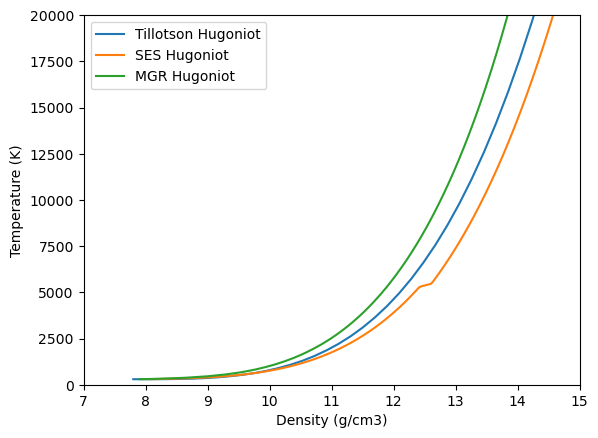

In [19]:
plt.plot(IronEOS.hug.rho,IronEOS.hug.T,label='Tillotson Hugoniot') # SES Units GPa
plt.plot(run.ieos[3].EOS.hug.rho,run.ieos[3].EOS.hug.T,label='SES Hugoniot') # in Mbar -> GPa
plt.plot(mgrarr/1.e3,mgtarr,label='MGR Hugoniot')

plt.legend()
plt.xlim(7,15)
plt.ylim(0,20000)
plt.xlabel('Density (g/cm3)')
plt.ylabel('Temperature (K)')
plt.show()

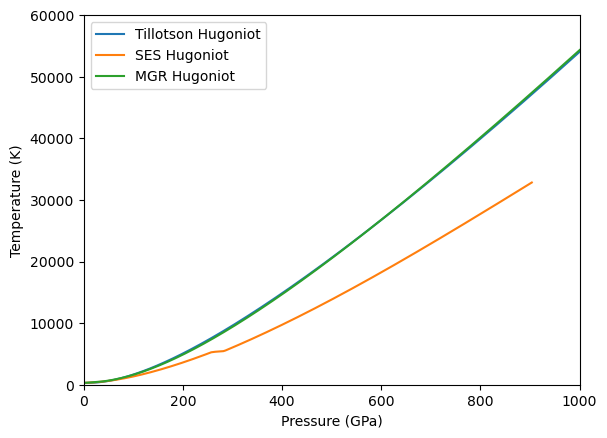

30179.522134090927
43402.89469820208


In [20]:
plt.plot(IronEOS.hug.P,IronEOS.hug.T,label='Tillotson Hugoniot') # SES Units GPa
plt.plot(run.ieos[3].EOS.hug.P*100,run.ieos[3].EOS.hug.T,label='SES Hugoniot') # in Mbar -> GPa
plt.plot(mgparr/1.e9,mgtarr,label='MGR Hugoniot')
plt.legend()
plt.xlim(0,1000)
plt.ylim(0,60000)
plt.xlabel('Pressure (GPa)')
plt.ylabel('Temperature (K)')
plt.show()
pmatch = 850
print(np.interp(pmatch,run.ieos[3].EOS.hug.P*100,run.ieos[3].EOS.hug.T))
print(np.interp(pmatch,IronEOS.hug.P,IronEOS.hug.T))



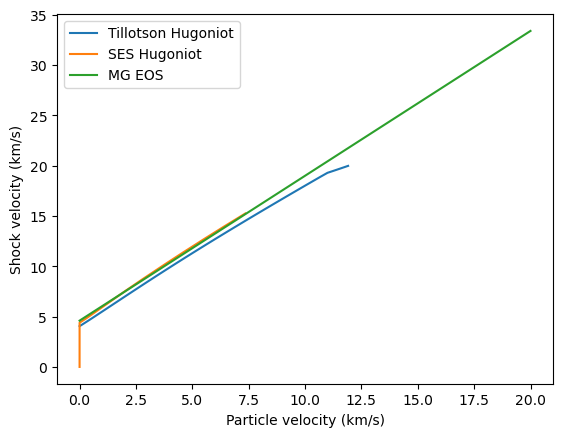

In [21]:
plt.plot(IronEOS.hug.up,IronEOS.hug.us,label='Tillotson Hugoniot') # SES Units
plt.plot(run.ieos[3].EOS.hug.up*10,run.ieos[3].EOS.hug.us*10,label='SES Hugoniot') # pyKO code units
plt.plot(mguparr/1.e3,mgusarr/1.e3,label='MG EOS')
plt.legend()
plt.xlabel('Particle velocity (km/s)')
plt.ylabel('Shock velocity (km/s)')
plt.show()

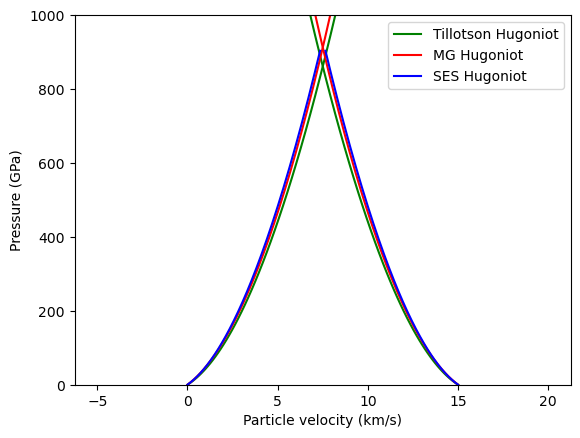

In [22]:
vimp=15
plt.plot(IronEOS.hug.up,IronEOS.hug.P,'-g',label='Tillotson Hugoniot') # SES Units GPa
plt.plot(vimp-IronEOS.hug.up,IronEOS.hug.P,'-g') # SES Units GPa
plt.plot(mguparr/1.e3,mgparr/1.e9,'-r',label='MG Hugoniot')
plt.plot(vimp-mguparr/1.e3,mgparr/1.e9,'-r')
plt.plot(run.ieos[3].EOS.hug.up*10,run.ieos[3].EOS.hug.P*100,'-b',label='SES Hugoniot') # in Mbar -> GPa
plt.plot(vimp-run.ieos[3].EOS.hug.up*10,run.ieos[3].EOS.hug.P*100,'-b') # in Mbar -> GPa
plt.legend()
#plt.xlim(0,11)
plt.ylim(0,1000)
plt.xlabel('Particle velocity (km/s)')
plt.ylabel('Pressure (GPa)')
plt.show()

End of notebook